In [2]:
# 데이터 출처 https://www.kaggle.com/datasets/podsyp/production-quality?resource=download&select=data_X.csv

# 필요한 모듈 및 패키지
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 독립 변수
# 5 챔버. 챔버 당 온도 센서 3개. 원료 투입 시 원료 높이(H) 및 습도(AH) 측정.
data_X = pd.read_csv('data_X.csv')
data_X

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103836,2018-12-31 23:56:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,157.20,8.44
2103837,2018-12-31 23:57:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.40,8.44
2103838,2018-12-31 23:58:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,160.14,8.44
2103839,2018-12-31 23:59:00,271,261,265,353,359,353,481,449,491,325,328,328,277,276,280,162.96,8.44


In [4]:
# 종속 변수
data_Y = pd.read_csv('data_Y.csv')
data_Y

,date_time,quality
0,2015-01-04 00:05:00,392
1,2015-01-04 01:05:00,384
2,2015-01-04 02:05:00,393
3,2015-01-04 03:05:00,399
4,2015-01-04 04:05:00,400
...,...,...
29179,2018-05-03 19:05:00,438
29180,2018-05-03 20:05:00,452
29181,2018-05-03 21:05:00,455
29182,2018-05-03 22:05:00,455


In [6]:
# 15년 1월 3일 23시 정각에 투입된 원료가 60분 간 로스팅 기기 안에서 가공된 뒤 배출된다고 가정했다.
# 배출된 가공품의 샘플 결과는 15년 1월 4일 0시 5분에 기록되었다고 가정했다.
data_X = data_X.drop(data_X.index[:4260], axis = 0)
data_X = data_X.drop(data_X.index[172800:], axis = 0)
data_X

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
4260,2015-01-03 23:00:00,265,337,263,335,326,340,493,497,527,316,343,336,234,239,237,157.37,4.73
4261,2015-01-03 23:01:00,265,337,263,335,326,341,494,497,529,316,343,336,234,238,237,152.83,4.73
4262,2015-01-03 23:02:00,265,337,263,335,326,341,494,497,530,316,344,336,234,238,238,156.82,4.73
4263,2015-01-03 23:03:00,266,338,263,335,326,341,495,497,532,316,345,336,234,238,238,154.81,4.73
4264,2015-01-03 23:04:00,266,338,263,335,326,341,495,497,534,316,346,336,234,238,238,154.92,4.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177055,2015-05-03 22:55:00,230,235,247,391,392,384,423,421,428,331,321,323,249,282,246,159.60,9.14
177056,2015-05-03 22:56:00,230,236,247,391,392,384,423,421,428,330,320,322,250,282,246,164.28,9.14
177057,2015-05-03 22:57:00,231,236,247,391,392,384,423,421,429,330,320,322,250,282,246,162.99,9.14
177058,2015-05-03 22:58:00,231,236,247,391,392,384,423,420,429,330,320,322,250,281,246,166.89,9.14


In [18]:
# data_X[0:60]

In [8]:
collist = data_X.columns.tolist()
collist = collist[1:] # date_time 제외

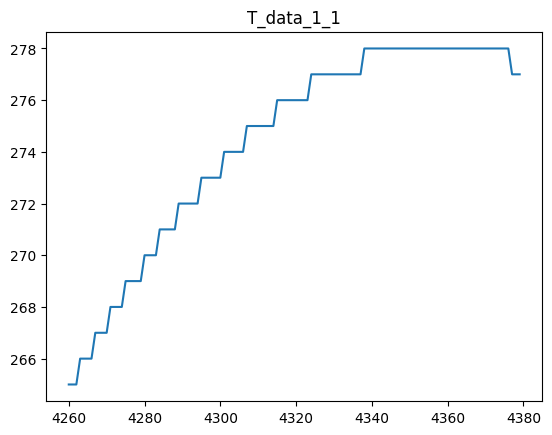

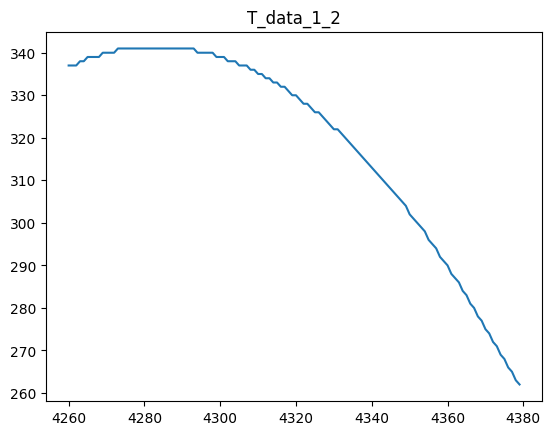

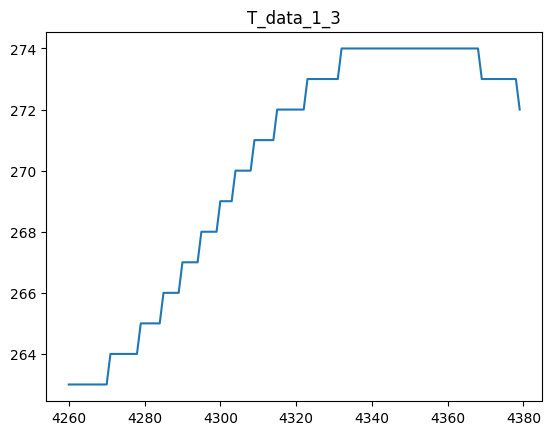

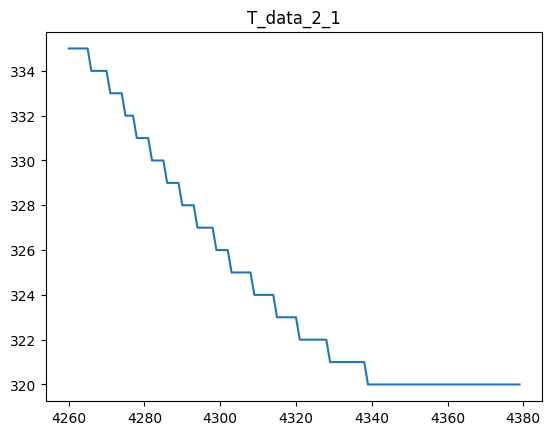

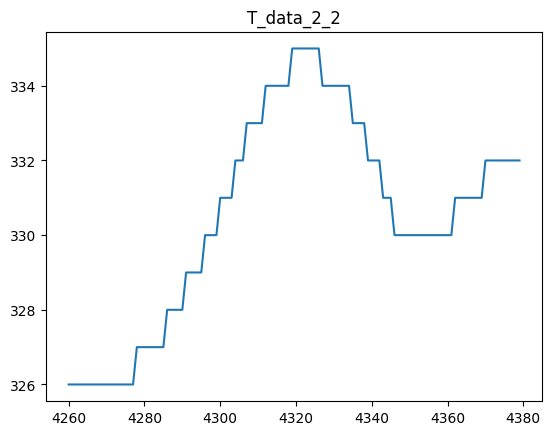

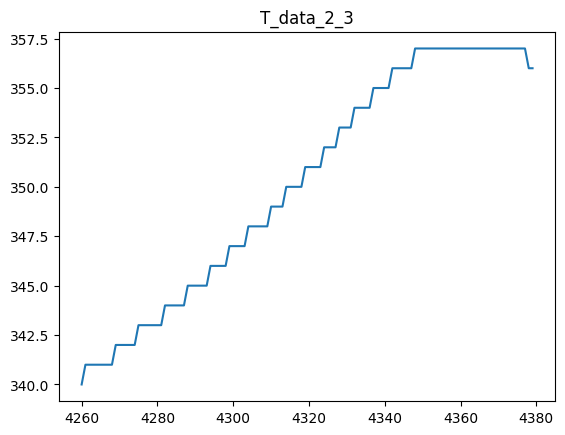

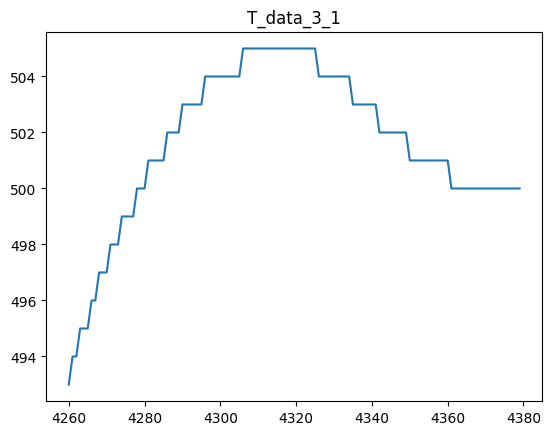

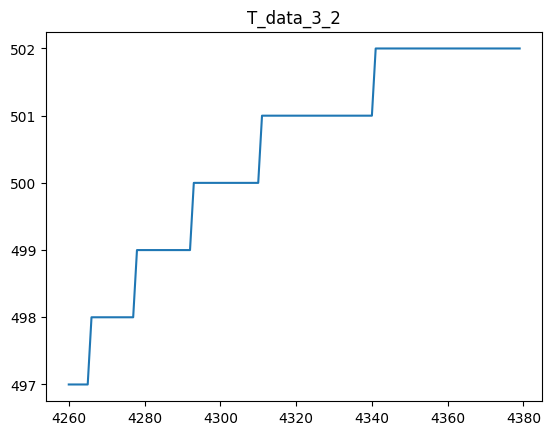

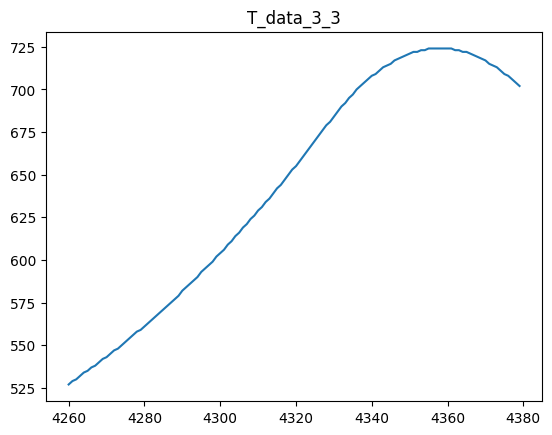

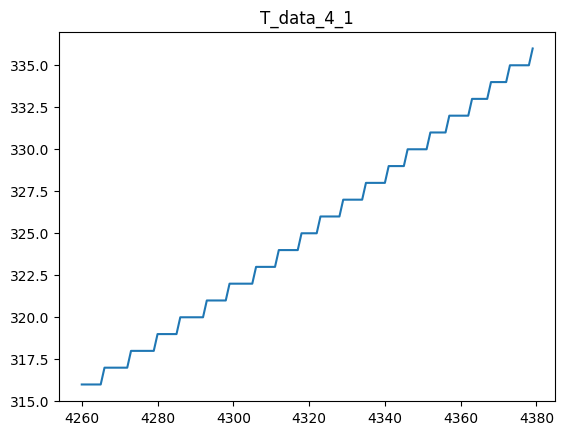

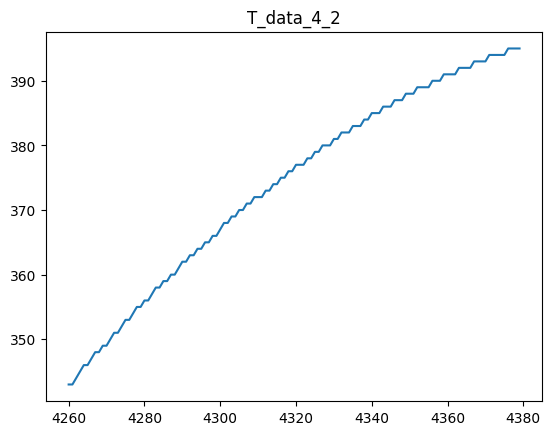

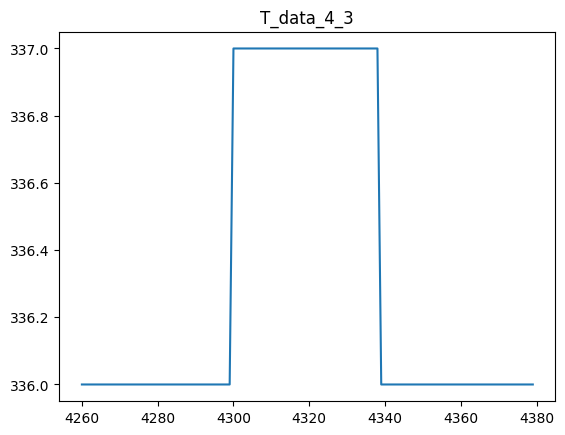

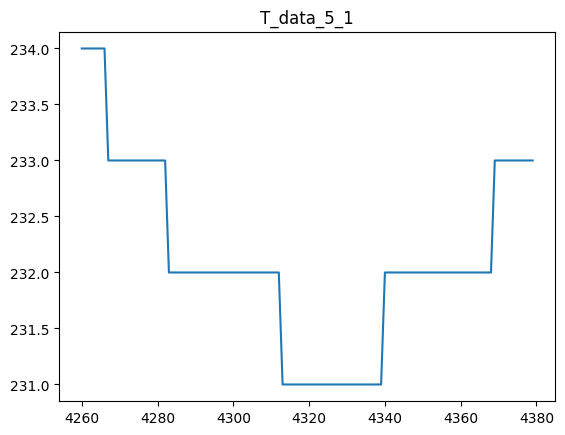

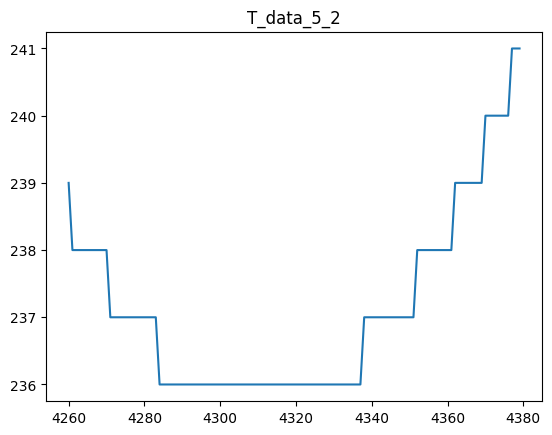

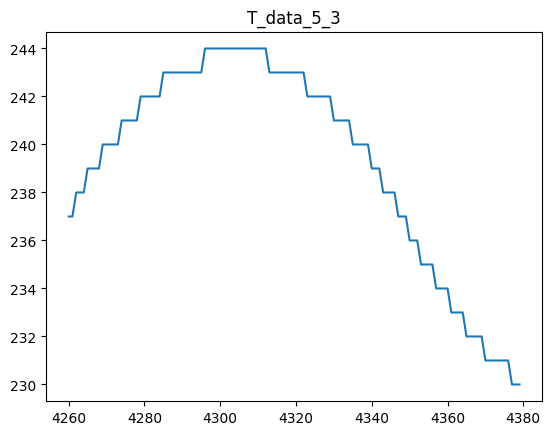

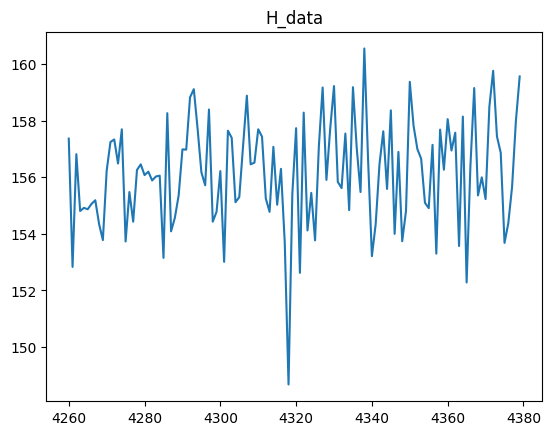

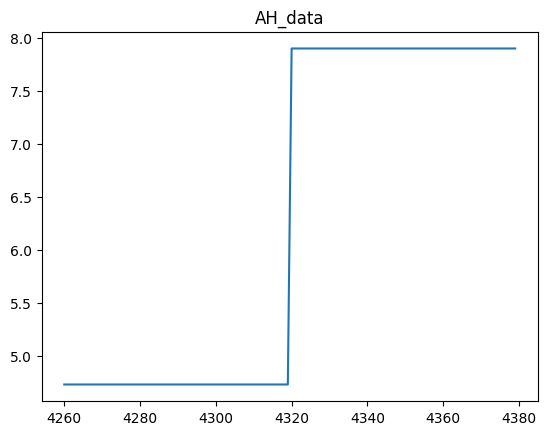

In [17]:
for i in collist:
    plt.plot(data_X[f'{i}'][0:120])
    plt.title(f'{i}')
    plt.show()